In [72]:
!pip install koreanize-matplotlib
!apt-get -qq install fonts-nanum

In [48]:
import pandas as pd

# CSV 파일 경로
file_path = "/content/new.csv"

# 데이터 불러오기
df = pd.read_csv(file_path, parse_dates=["DATE"])

df.columns.to_list()

['DATE',
 'GDP(십억원)',
 'GNI(십억원)',
 'GDP_GROWTH(%)',
 'KOSPI',
 '국고채(3년)(%)',
 '국고채(10년)(%)',
 '뉴스심리지수',
 '경제심리지수',
 '수출금액지수',
 '수입금액지수',
 '수출물가지수(원화기준)',
 '수출물가지수(계약통화기준)',
 '수출물가지수(달러기준)',
 '수입물가지수(원화기준)',
 '수입물가지수(계약통화기준)',
 '수입물가지수(달러기준)',
 '대외채권',
 '대외채무',
 '순대외채권',
 '외환보유액(천달러)',
 '기준금리',
 'CD(91일)',
 '무담보콜금리(1일, 전체거래)',
 '경상수지(계절조정)',
 'CPI',
 'PPI',
 '원/미국달러(매매기준율)',
 '일본엔/달러',
 '달러/유로',
 '미국기준금리']

In [49]:
# 각 컬럼별 결측치 개수 확인
missing_counts = df.isnull().sum()

# 결측치가 있는 컬럼만 출력
missing_counts = missing_counts[missing_counts > 0]

# 결과 출력
print("📌 결측치가 있는 컬럼과 개수:")
print(missing_counts)

📌 결측치가 있는 컬럼과 개수:
GDP_GROWTH(%)          91
KOSPI               12786
국고채(3년)(%)          14196
국고채(10년)(%)         14962
뉴스심리지수              16437
경제심리지수              15706
수출금액지수              10227
수입금액지수              10227
수출물가지수(원화기준)         4018
수출물가지수(계약통화기준)       4018
수출물가지수(달러기준)         4018
수입물가지수(원화기준)         4018
수입물가지수(계약통화기준)       4018
수입물가지수(달러기준)         4018
대외채권                12692
대외채무                12692
순대외채권               12692
외환보유액(천달러)           4018
기준금리                14370
CD(91일)             12786
무담보콜금리(1일, 전체거래)    12786
경상수지(계절조정)          12786
CPI                  1827
PPI                  1827
원/미국달러(매매기준율)        1585
일본엔/달러               6300
달러/유로               12519
미국기준금리               8305
dtype: int64


가설 1) 미국의 금리가 상승하면 환율이 올라간다?



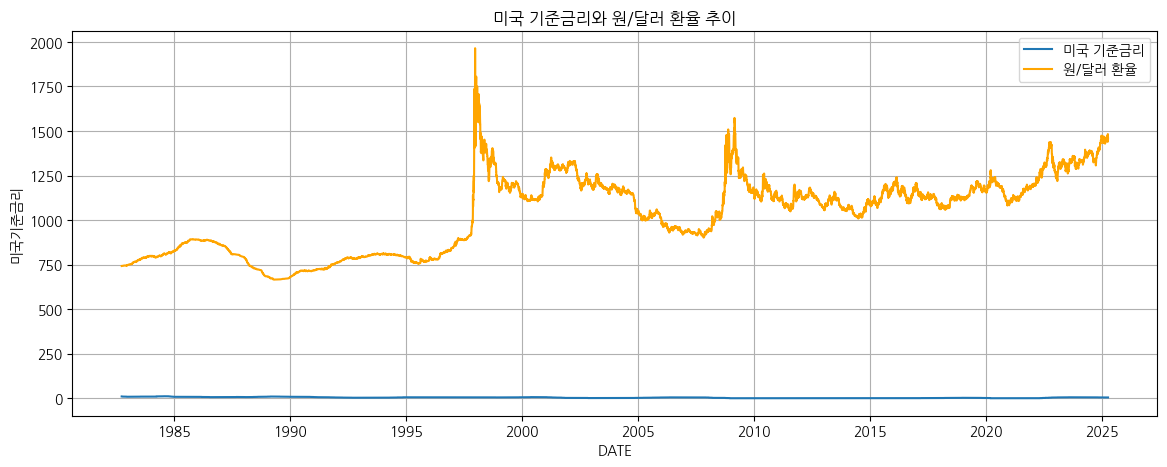

미국 기준금리와 원/달러 환율 간의 상관계수:
                 미국기준금리  원/미국달러(매매기준율)
미국기준금리         1.000000      -0.573685
원/미국달러(매매기준율) -0.573685       1.000000


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 2. 분석에 필요한 컬럼만 선택
cols = ['DATE', '미국기준금리', '원/미국달러(매매기준율)']
df_sub = df[cols].dropna()  # 결측치 제거

# 3. 미국 기준금리와 원/달러 환율 시계열 그래프
plt.figure(figsize=(14,5))
sns.lineplot(data=df_sub, x='DATE', y='미국기준금리', label='미국 기준금리')
sns.lineplot(data=df_sub, x='DATE', y='원/미국달러(매매기준율)', label='원/달러 환율', color='orange')
plt.title("미국 기준금리와 원/달러 환율 추이")
plt.legend()
plt.grid(True)
plt.show()

# 4. 상관계수 출력 (두 변수 간의 연관성 확인)
correlation = df_sub[['미국기준금리', '원/미국달러(매매기준율)']].corr()
print("미국 기준금리와 원/달러 환율 간의 상관계수:")
print(correlation)

Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


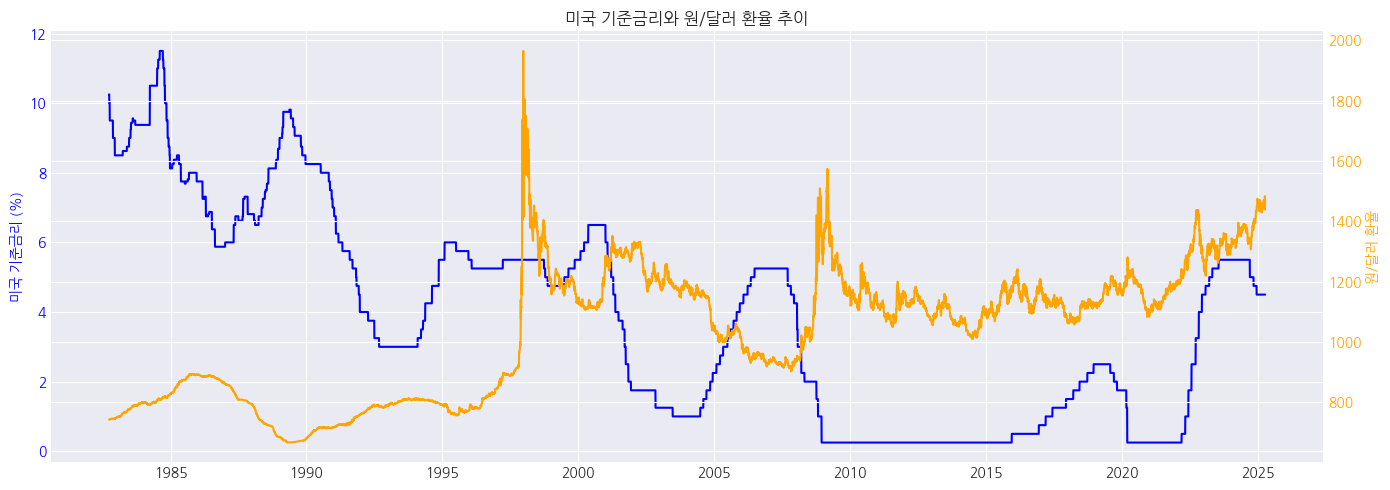

In [79]:
# 1. 나눔폰트 설치 (한 번만 실행하면 됩니다)

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# 2. matplotlib에 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 시각화
cols = ['DATE', '미국기준금리', '원/미국달러(매매기준율)']
df_sub = df[cols].dropna()

fig, ax1 = plt.subplots(figsize=(14, 5))

# 왼쪽 Y축: 미국 기준금리
ax1.plot(df_sub['DATE'], df_sub['미국기준금리'], color='blue', label='미국 기준금리')
ax1.set_ylabel('미국 기준금리 (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 Y축: 원/달러 환율
ax2 = ax1.twinx()
ax2.plot(df_sub['DATE'], df_sub['원/미국달러(매매기준율)'], color='orange', label='원/달러 환율')
ax2.set_ylabel('원/달러 환율', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('미국 기준금리와 원/달러 환율 추이')
fig.tight_layout()
plt.grid(True)
plt.show()

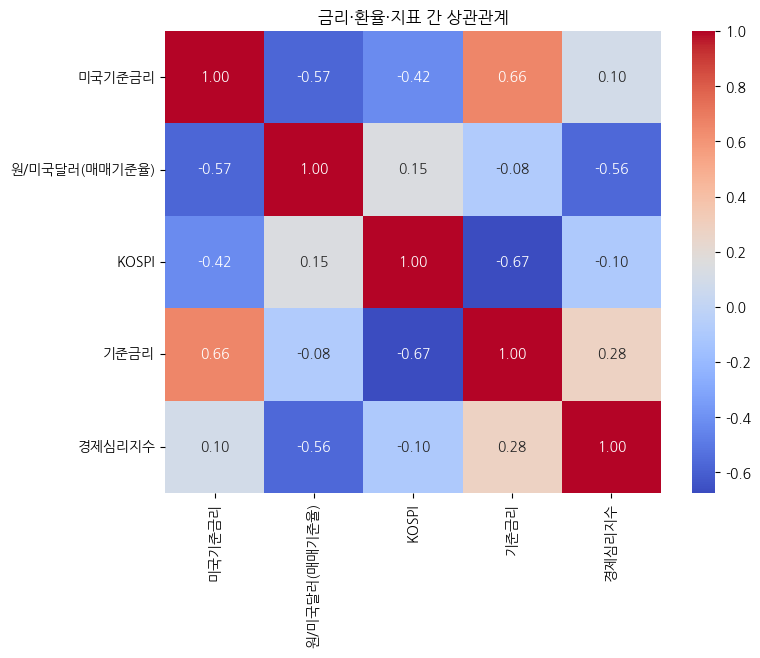

In [68]:
cols = ['미국기준금리', '원/미국달러(매매기준율)', 'KOSPI', '기준금리', '경제심리지수']
corr_matrix = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("금리·환율·지표 간 상관관계")
plt.show()

가설2) 경제심리지수 또는 뉴스심리지수가 높을수록 투자자 신뢰가 높아져 외국 자본 유입 가능성이 커지고 환율은 하락한다.